# Mini Project 3 - Presentation 

I will look at the Permutation Importance for each of my trees to see what the more important features are.

In [57]:
perm = PermutationImportance(tree1, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0385 ± 0.0596,st_depression
0.0346 ± 0.0288,typical_angina
0.0231 ± 0.0288,num_vessels_0
0.0154 ± 0.0288,non_anginal_pain
0.0154 ± 0.0288,fixed defect
0.0154 ± 0.0154,ST-T wave abnormality
0.0115 ± 0.0188,atypical_angina
0.0038 ± 0.0449,cholesterol
0.0038 ± 0.0288,female
0.0038 ± 0.0154,reversable defect


In [58]:
perm = PermutationImportance(tree2, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1269 ± 0.0392,fixed defect
0.0885 ± 0.0792,typical_angina
0.0692 ± 0.0625,num_vessels_0
0 ± 0.0000,atypical_angina
0 ± 0.0000,non_anginal_pain
0 ± 0.0000,asymptomatic_pain
0 ± 0.0000,normal
0 ± 0.0000,ST-T wave abnormality
0 ± 0.0000,left ventricular hypertrophy
0 ± 0.0000,not_exercise_induced_angina


The most important features included num_vessels, max_heart_rate_achieved, fixed defect, and exercise_induced_angina. Since tree1 gave me more data for feature correlation than tree 2, I will continue looking at tree1 for my remaining plots. 

View a Partial Dependence Plot for some of the top features.

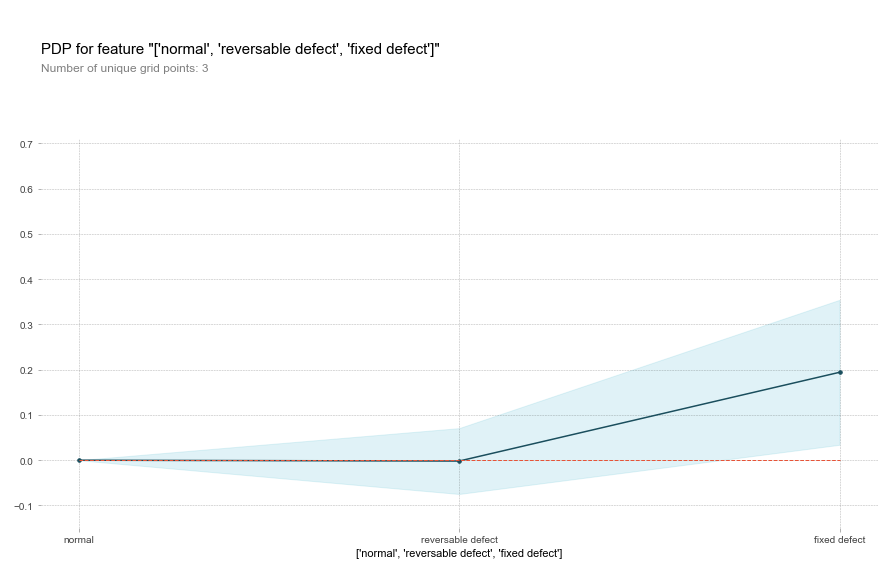

In [61]:
base_features = df.columns.values.tolist()
feat_name = [('normal'), ('reversable defect'), ('fixed defect')]
pdp_dist = pdp.pdp_isolate(model=tree1, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

The probability of heart disease decreases with a reversible defect and increases with a fixed defect.

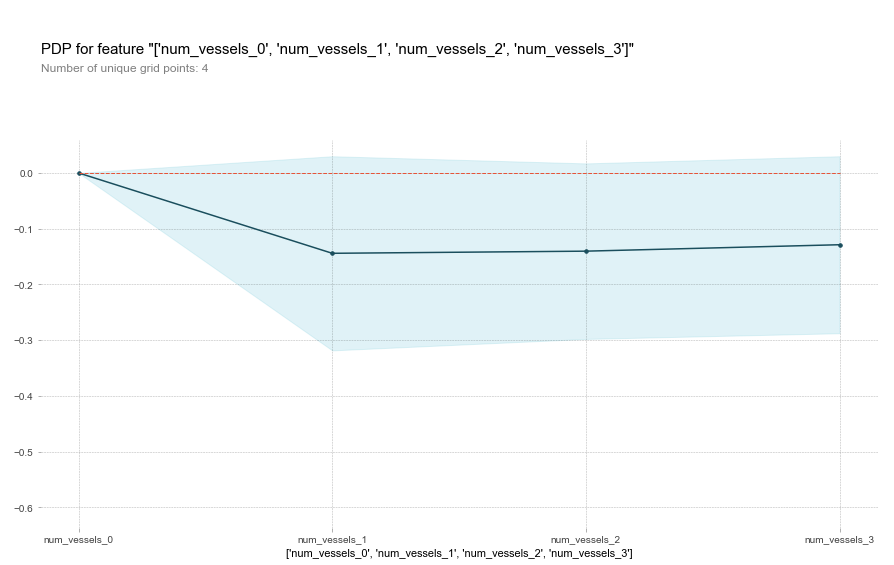

In [62]:
base_features = df.columns.values.tolist()

feat_name = [('num_vessels_0'), ('num_vessels_1'), ('num_vessels_2'), ('num_vessels_3')]
pdp_dist = pdp.pdp_isolate(model=tree1, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

This looks like the probability of heart disease increases as the number of vessels increases.

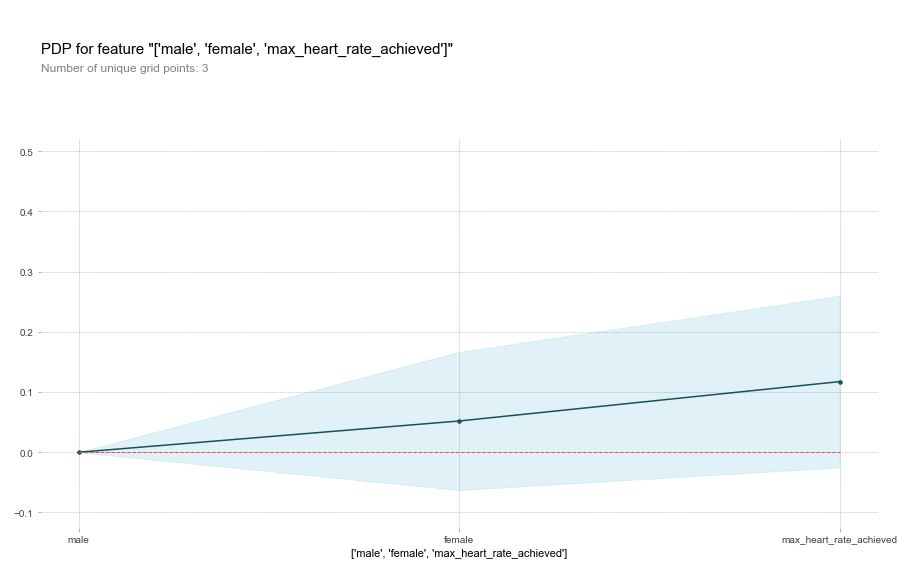

In [63]:
base_features = df.columns.values.tolist()

feat_name = [('male'), ('female'), ('max_heart_rate_achieved')]
pdp_dist = pdp.pdp_isolate(model=tree1, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

This suggests that females are more likely have heart disease and those who achieved max heart rate are even more likely.

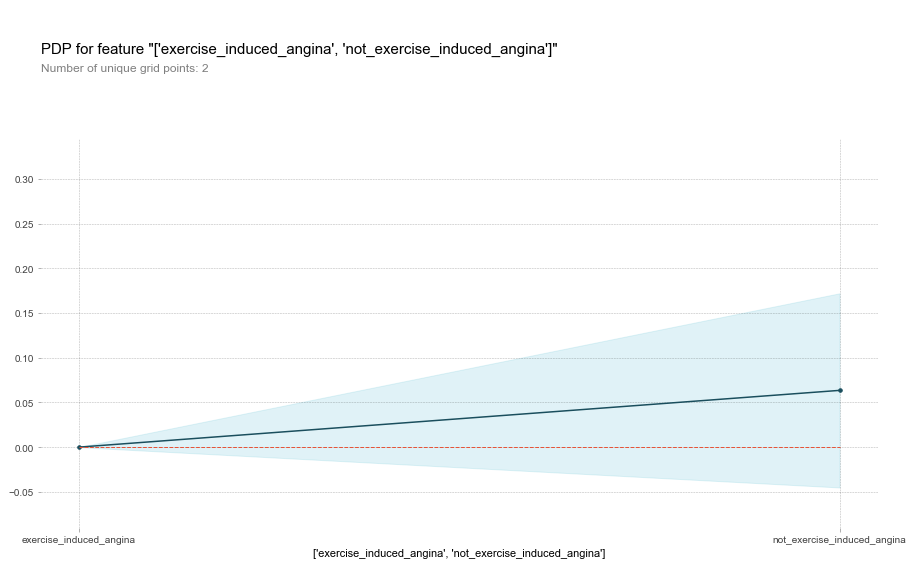

In [64]:
base_features = df.columns.values.tolist()

feat_name = [('exercise_induced_angina'), ('not_exercise_induced_angina')]
pdp_dist = pdp.pdp_isolate(model=tree1, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

The probability increases with angina not induced by excersise.

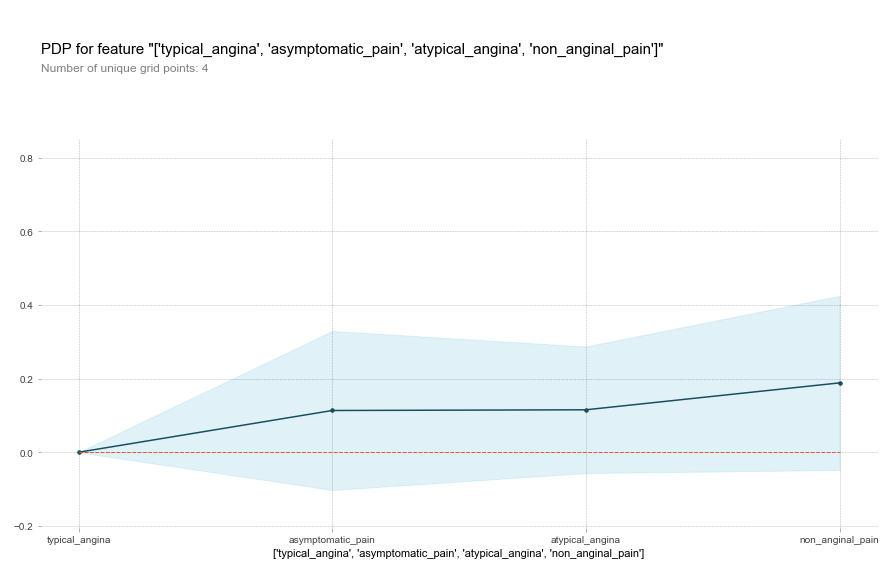

In [65]:
base_features = df.columns.values.tolist()

feat_name = [('typical_angina'), ('asymptomatic_pain'), ('atypical_angina'), ('non_anginal_pain')]
pdp_dist = pdp.pdp_isolate(model=tree1, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

The probability of heart disease increases with asymtomatic angina, which is similar with atypical, and increases more with non-anginal pain.

Next, look at the SHAP values of the features and it's summary plot. SHAP, SHapley Additive exPlanations, shows the importance value for each feature on the prediction.

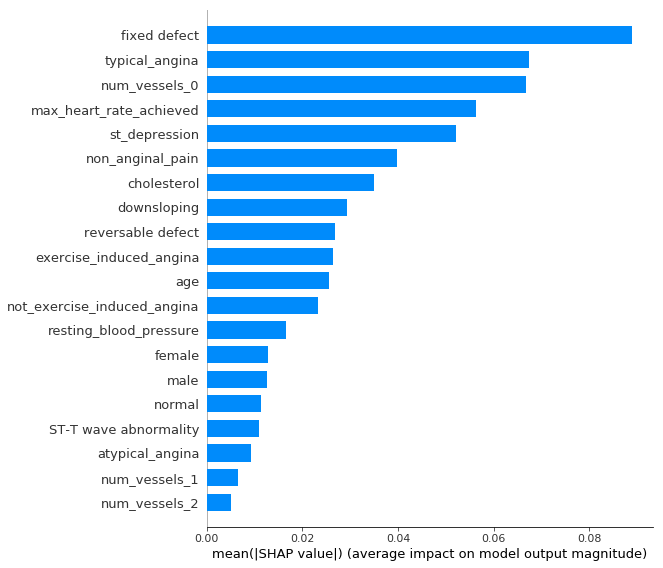

In [66]:
explainer = shap.TreeExplainer(tree1)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

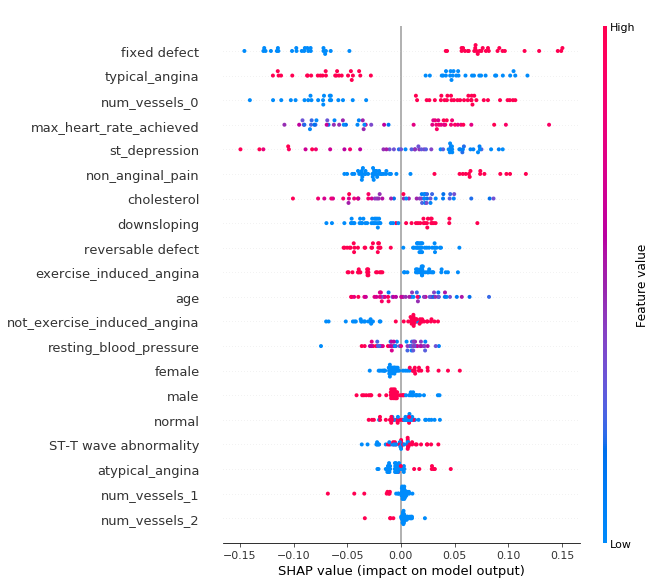

In [67]:
shap.summary_plot(shap_values[1], X_test)


## Hypothesis

I was given this data set with 14 features and 303 observations. The mean age is 54.
There are twice as many males in the study than females, 207 and 96. Given the data set, my hypothesis is that the greatest influencing variable are: 1. the number of vessels, 2. the type of defect, and 3. the type of angina. Specifically, 1. the lower number of major vessels, 2. a reversible defect, and 3. typical angina. This hypothesis is supported by the Partial Dependence Plots and SHAP plots above. In the future, I would collect more data to perform testing on. I would gather the same number of males and females so that the data could be divided to see if the more influential features vary between sexes. I would focus on more information related to those greatest influencing factors from this study. Nonetheless, I have learned a bit about heart disease from this project, and a lot about machine learning!